In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv(r"Student_performance_data.csv")

In [10]:
display(data.describe()) #numerical data
print(data.info())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB
None


**How are you going to address the issue of NULL values, missing values, irrelevant values of the features? (Check if it is there)**

In [11]:
# Check for NULL values
print("\nNULL Values in the Dataset:")
print(data.isnull().sum())

# Handling NULL values (example: filling with mean for numerical columns)
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify that there are no NULL values left
print("\nDataset Information After Handling NULL Values:")
print(data.info())

# Check for irrelevant values in categorical columns
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].unique()}")

# Save the cleaned dataset
data.to_csv('path_to_cleaned_dataset.csv', index=False)

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset (first few rows):")
print(data.head())


NULL Values in the Dataset:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Dataset Information After Handling NULL Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2

## There's no missing value here
## Strategy to handle missing values (imputation or removal)
Filling numerical NaN values with median
-> df.fillna(df.median(), inplace=True)  
Filling numerical NaN values with mean
-> df.fillna(df.mean(), inplace=True)  
Filling numerical NaN values with mode
-> df.fillna(df.mode(), inplace=True)


In [12]:
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
# Function to identify and print outliers based on IQR
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers
outliers = identify_outliers(data, numerical_columns)

# Print outliers
for col, outlier_data in outliers.items():
    print(f"\nOutliers in {col}:")
    print(outlier_data[[col]])


Outliers in Age:
Empty DataFrame
Columns: [Age]
Index: []

Outliers in StudyTimeWeekly:
Empty DataFrame
Columns: [StudyTimeWeekly]
Index: []

Outliers in Absences:
Empty DataFrame
Columns: [Absences]
Index: []

Outliers in GPA:
Empty DataFrame
Columns: [GPA]
Index: []


## There's no Outlier in this dataset

# Removing outliers (if in case there are outliers)

Box plots before removing outliers:


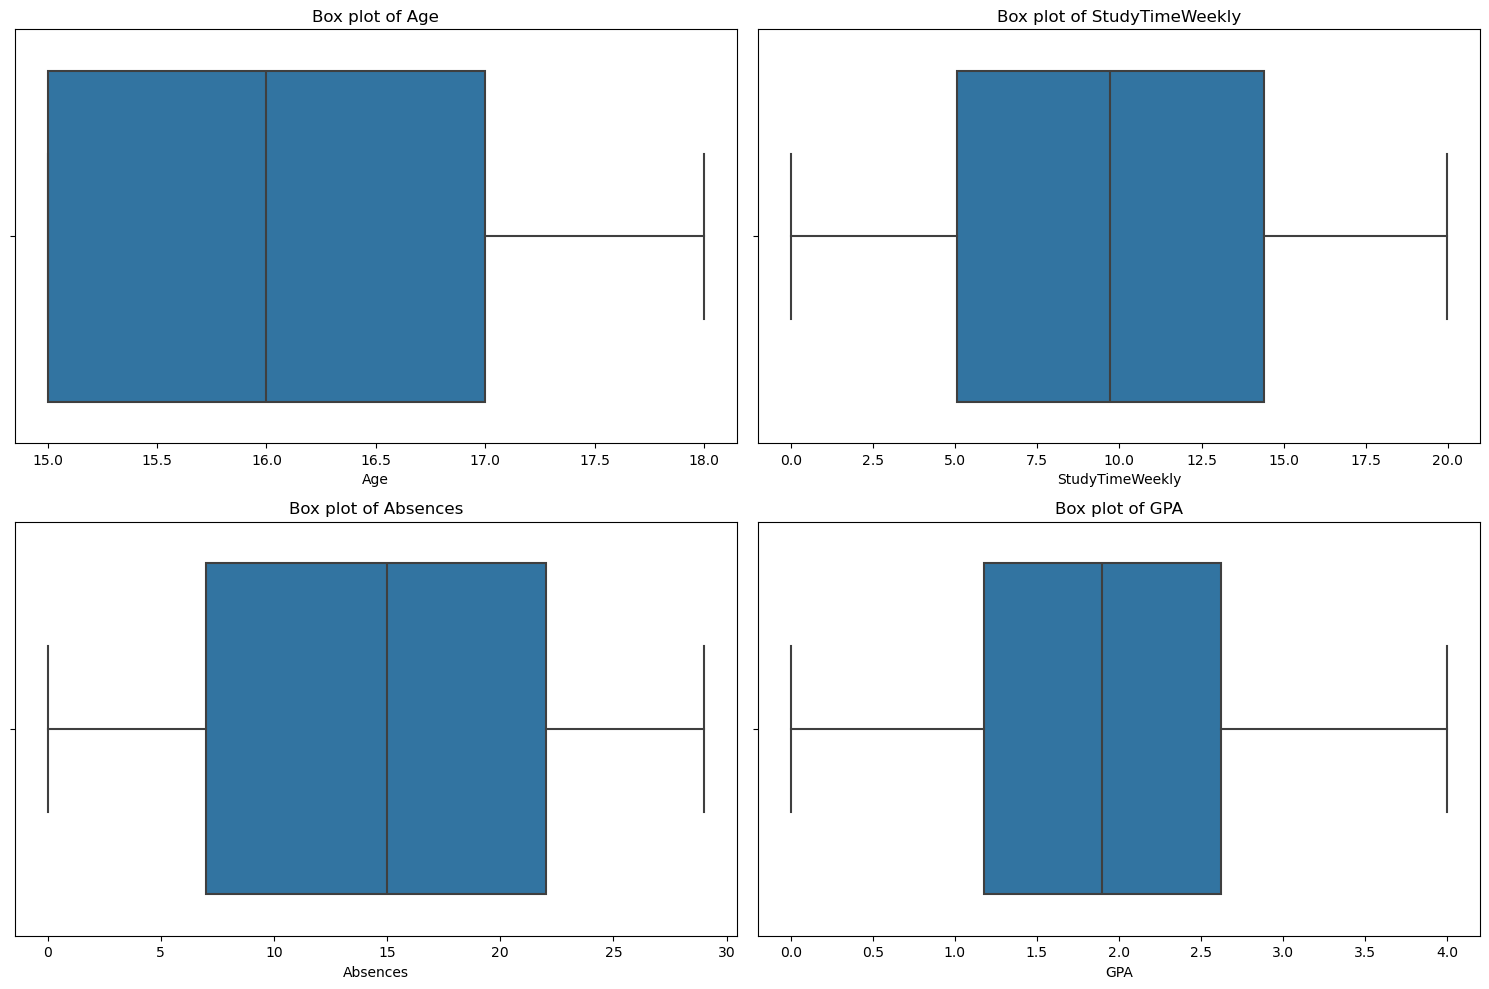

Box plots after removing outliers:


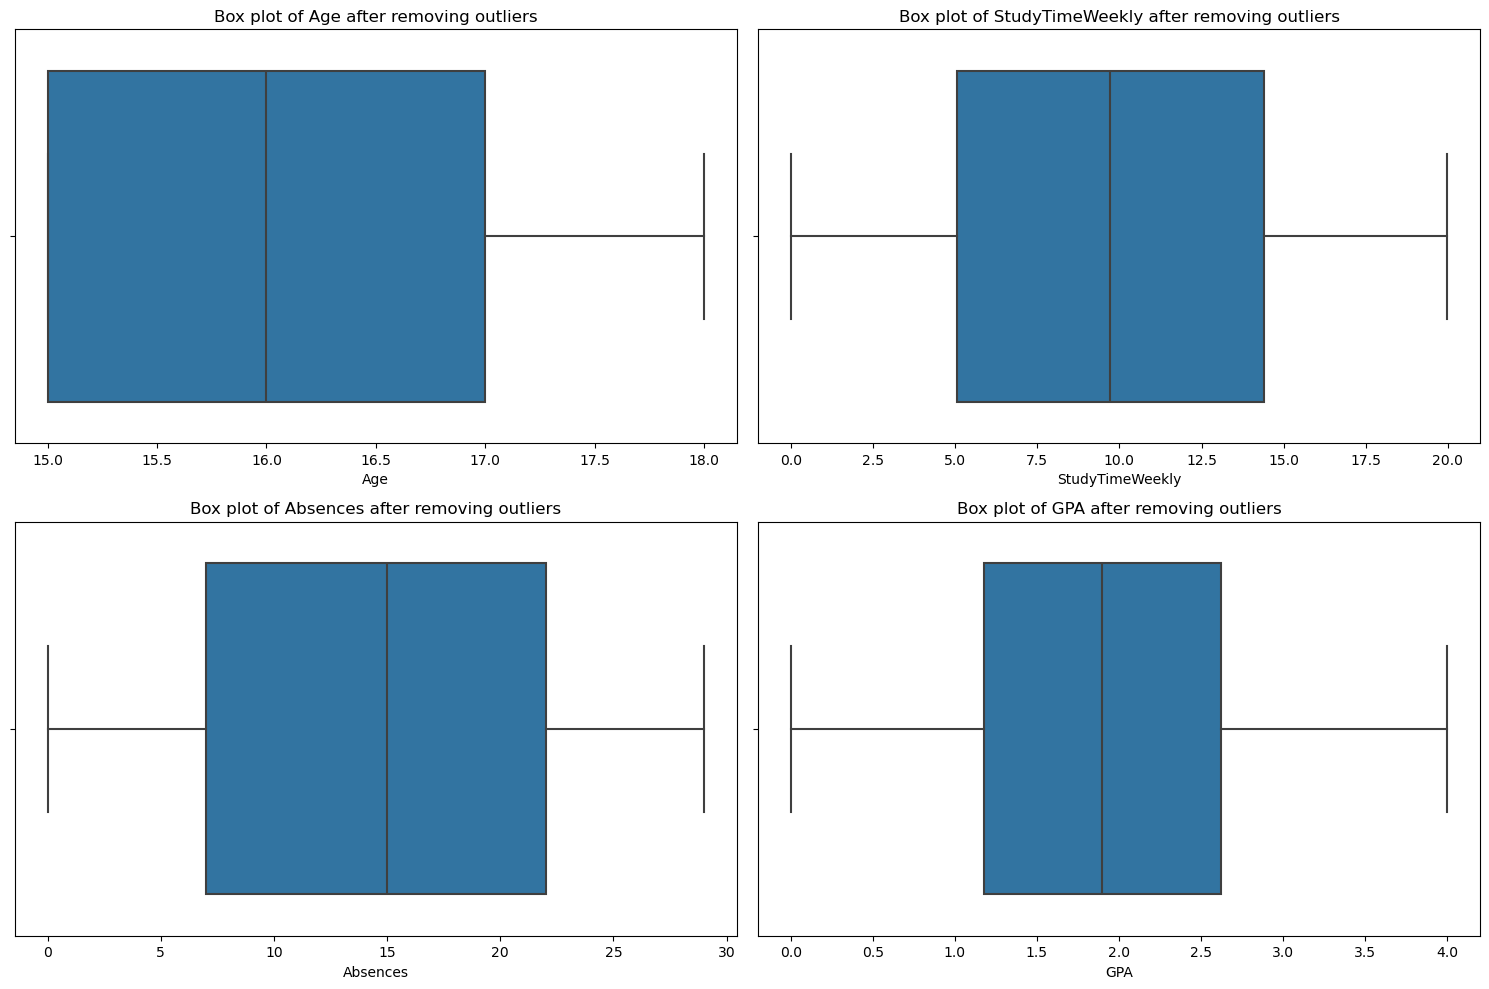

In [13]:
print("Box plots before removing outliers:")
# Visualize outliers using box plots for numerical columns
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data = remove_outliers(data, numerical_columns)

print("Box plots after removing outliers:")
# Visualize data after removing outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col} after removing outliers')

plt.tight_layout()
plt.show()

Here the box plot before and after outlier removal is same because there're no outliers

The dataset does not contain any non-numeric features. 

**All features are either integer or float types.**

However, some of these numeric features represent categorical data (e.g., Gender, Ethnicity, ParentalEducation, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, and GradeClass).order.

# Handling Categorical Data
Even though these features are numeric, they represent categorical data and should be treated accordingly during data processing. 
Here are some common techniques for handling categorical data:

- **Label Encoding:** Convert categorical values to numeric values. This is appropriate when the categorical values have a meaningful order.
- **One-Hot Encoding:** Convert categorical values to binary columns. This is appropriate when the categorical values do not have a meaningful order.

#### What is the probability that a student will fall into low grade category based on their more extracurricular participation and parental support>=2?

In [34]:
# 1. Likelihood of achieving higher grades (GPA > 3) based on Study Time and Tutoring
high_gpa_students = data[data['GPA'] > 3]

# Probability of high GPA given study time
studytime_prob = high_gpa_students.groupby('StudyTimeWeekly').size() / data.groupby('StudyTimeWeekly').size()

# Probability of high GPA given tutoring support
tutoring_prob = high_gpa_students.groupby('Tutoring').size() / data.groupby('Tutoring').size()

print("\nLikelihood of achieving GPA > 3 based on Study Time:\n", studytime_prob)
print("\nLikelihood of achieving GPA > 3 based on Tutoring Support:\n", tutoring_prob)

# 2. Probability of low-grade category (GPA < 2.5) given more extracurricular participation & parental support >= 2
low_gpa_students = data[data['GPA'] < 2.5]

# Filtering students with high extracurricular and parental support >= 2
filtered_students = data[(data['Extracurricular'] >= data['Extracurricular'].median()) & (data['ParentalSupport'] >= 2)]

# Probability of low GPA given high extracurricular participation & parental support >= 2
low_gpa_prob = len(low_gpa_students[low_gpa_students.index.isin(filtered_students.index)]) / len(filtered_students)

print(f"\nProbability that a student will fall into a low-grade category given high extracurricular participation & parental support >= 2: {low_gpa_prob:.2f}")



Likelihood of achieving GPA > 3 based on Study Time:
 StudyTimeWeekly
0.001057     NaN
0.004859     NaN
0.008031     NaN
0.008206     NaN
0.014337     NaN
            ... 
19.939810    NaN
19.948459    1.0
19.968425    NaN
19.972346    NaN
19.978094    NaN
Length: 2392, dtype: float64

Likelihood of achieving GPA > 3 based on Tutoring Support:
 Tutoring
0    0.104129
1    0.203883
dtype: float64

Probability that a student will fall into a low-grade category given high extracurricular participation & parental support >= 2: 0.68


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data['high_grade'] = (data['GPA'] > 3).astype(int)  # 1 if GPA > 3, else 0
probability_df = data.groupby(['StudyTimeWeekly', 'Tutoring'])['high_grade'].mean().reset_index()

# Prepare features and target variable
X = probability_df[['StudyTimeWeekly', 'Tutoring']]
y = probability_df['high_grade'].astype(int)  # Convert boolean to binary (0/1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Model coefficients (impact of study time & tutoring on achieving high grades)
print("Impact of Study Time & Tutoring on High GPA:")
print(f"Study Time Coefficient: {model.coef_[0][0]}")
print(f"Tutoring Coefficient: {model.coef_[0][1]}")


Impact of Study Time & Tutoring on High GPA:
Study Time Coefficient: 0.0637206929396949
Tutoring Coefficient: 0.7716593082342171


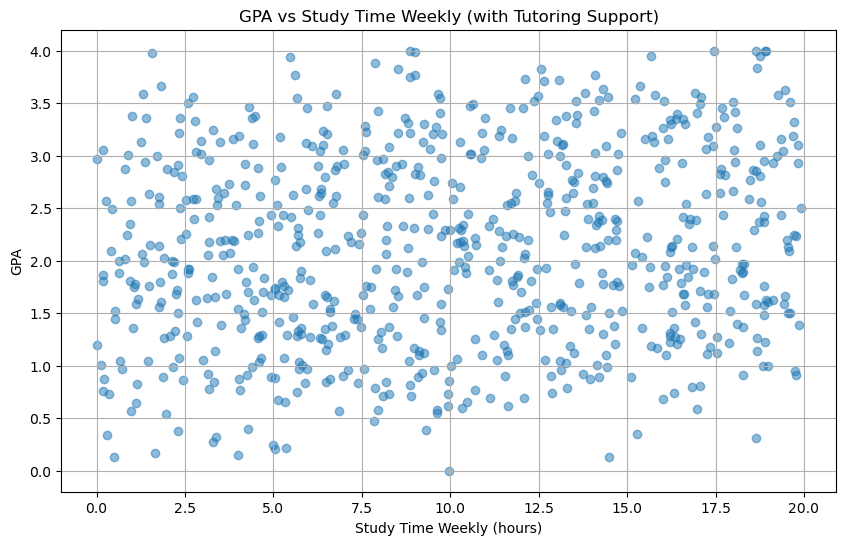

In [41]:
# Filter data where tutoring support is present (Tutoring = 1)
tutoring_data = data[data['Tutoring'] == 1]

# Plot HighGrade vs StudyTimeWeekly
plt.figure(figsize=(10, 6))
plt.scatter(tutoring_data['StudyTimeWeekly'], tutoring_data['GPA'], alpha=0.5, marker='o')
plt.xlabel('Study Time Weekly (hours)')
plt.ylabel('GPA')
plt.title('GPA vs Study Time Weekly (with Tutoring Support)')
plt.grid(True)
plt.show()

## Are there any non-numeric features in the dataset? If yes, how are you going to handle it?

In [14]:
# Identify categorical columns
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataset
print(data.head())

   StudentID  Age  StudyTimeWeekly  Absences       GPA  Gender_0  Gender_1  \
0       1001   17        19.833723         7  2.929196     False      True   
1       1002   18        15.408756         0  3.042915      True     False   
2       1003   15         4.210570        26  0.112602      True     False   
3       1004   17        10.028829        14  2.054218     False      True   
4       1005   17         4.672495        17  1.288061     False      True   

   Ethnicity_0  Ethnicity_1  Ethnicity_2  ...  Sports_1  Music_0  Music_1  \
0         True        False        False  ...     False    False     True   
1         True        False        False  ...     False     True    False   
2        False        False         True  ...     False     True    False   
3         True        False        False  ...     False     True    False   
4         True        False        False  ...     False     True    False   

   Volunteering_0  Volunteering_1  GradeClass_0  GradeClass_1  Grade

In [15]:
data.columns

Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'Gender_0',
       'Gender_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3',
       'ParentalEducation_0', 'ParentalEducation_1', 'ParentalEducation_2',
       'ParentalEducation_3', 'ParentalEducation_4', 'Tutoring_0',
       'Tutoring_1', 'ParentalSupport_0', 'ParentalSupport_1',
       'ParentalSupport_2', 'ParentalSupport_3', 'ParentalSupport_4',
       'Extracurricular_0', 'Extracurricular_1', 'Sports_0', 'Sports_1',
       'Music_0', 'Music_1', 'Volunteering_0', 'Volunteering_1',
       'GradeClass_0', 'GradeClass_1', 'GradeClass_2', 'GradeClass_3',
       'GradeClass_4'],
      dtype='object')

## How are the numerical features distributed in the dataset?
**To analyze the distribution of numerical features in the dataset, we can create histograms for each numerical column.**

This will help us understand the distribution patterns, such as normal distribution, skewness, or the presence of outliers.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

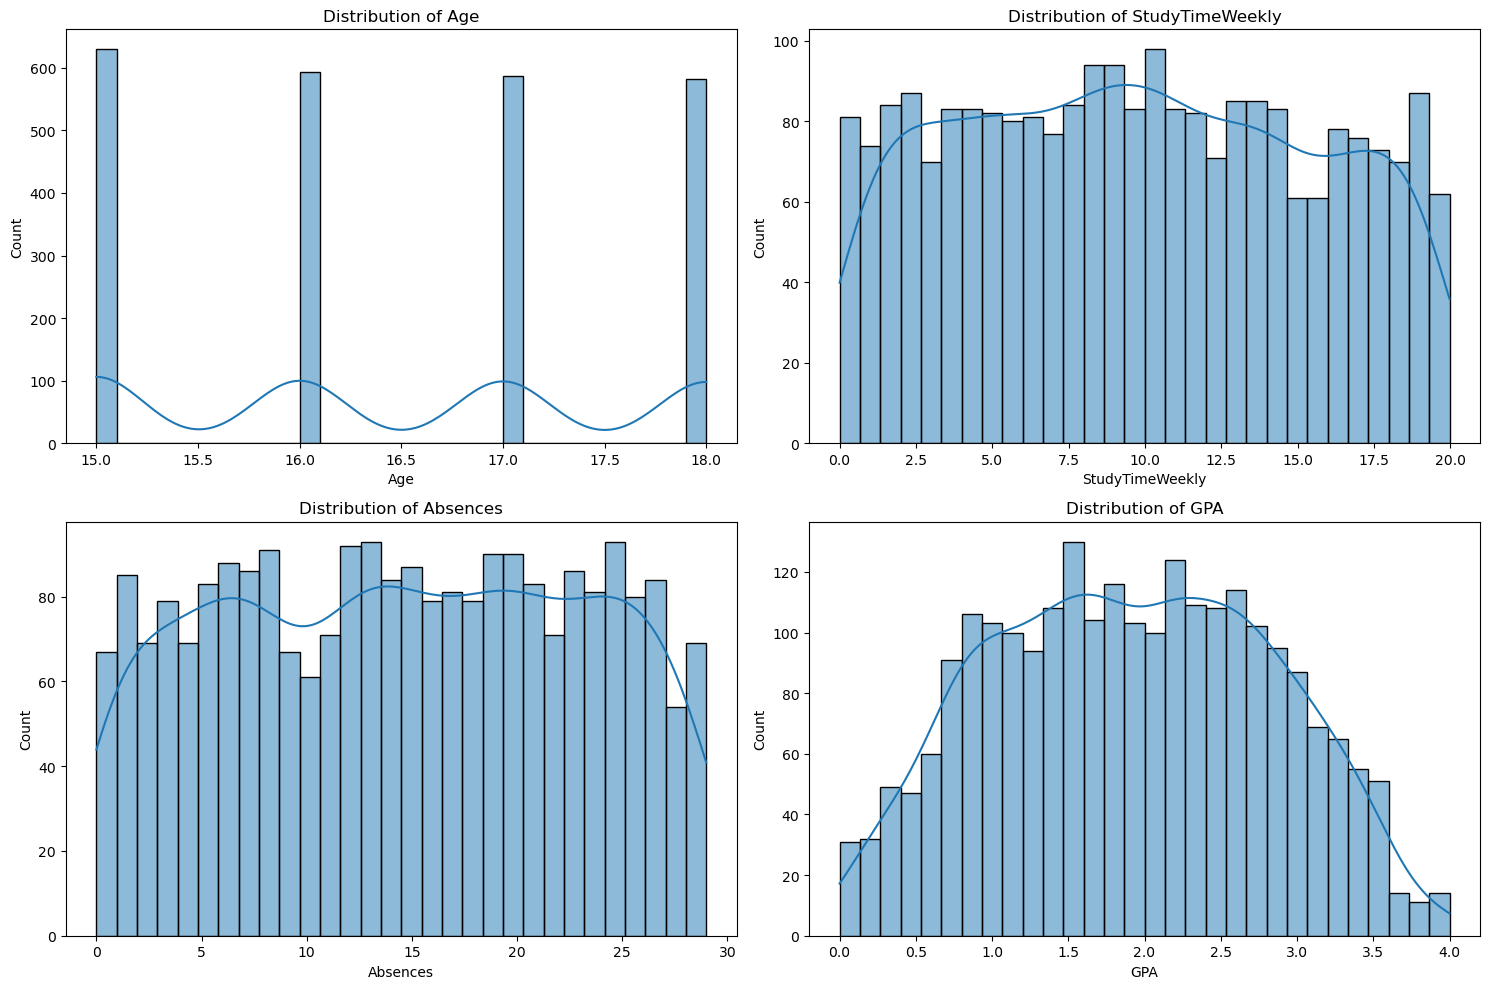

In [16]:
# Visualize the distribution of numerical features using histograms
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## In case of bi-class classification what is ratio of the two classes in the dependent variable? 
To determine the ratio of the two classes in the dependent variable for a bi-class classification, we first need to identify which column is the dependent variable. Based on the dataset description, the GradeClass column is used to classify students' grades. 

`For bi-class classification`, we need to map the existing classes into two categories.

Let's assume that we are mapping the grades into two categories:

- **Pass (A, B, C)**

- **Fail (D, F)**

In [18]:
# Map the grades into two categories: Pass (A, B, C) and Fail (D, F)
data['GradeClass_Binary'] = data['GradeClass_0'] | data['GradeClass_1'] | data['GradeClass_2']
data['GradeClass_Binary'] = data['GradeClass_Binary'].apply(lambda x: 'Pass' if x == 1 else 'Fail')

# Calculate the ratio of the two classes
class_counts = data['GradeClass_Binary'].value_counts()
total = class_counts.sum()
class_ratios = class_counts / total

# Print the ratio of the two classes
print("Class Counts:")
print(class_counts)
print("\nClass Ratios:")
print(class_ratios)
data.drop(columns=['GradeClass_0', 'GradeClass_1',"GradeClass_2","GradeClass_3","GradeClass_4"], inplace=True)

Class Counts:
GradeClass_Binary
Fail    1625
Pass     767
Name: count, dtype: int64

Class Ratios:
GradeClass_Binary
Fail    0.679348
Pass    0.320652
Name: count, dtype: float64


In [19]:
# Convert 'Pass'/'Fail' to numerical values
data['GradeClass_Binary'] = data['GradeClass_Binary'].map({'Pass': 1, 'Fail': 0})

## How are the mean/variance values of independent variables correlated?

In [14]:
# Drop the dependent variable column to only consider independent variables
# Assuming 'GradeClass_Binary' is the dependent variable after encoding
independent_data = data.drop(columns=['GradeClass_Binary'])

# Calculate mean and variance for each independent variable
mean_values = independent_data.mean()
variance_values = independent_data.var()

# Create a DataFrame to store mean and variance values
mean_variance_df = pd.DataFrame({'Mean': mean_values, 'Variance': variance_values})

# Calculate the correlation matrix of mean and variance values
correlation_matrix = mean_variance_df.corr()

# Print the mean and variance values
print("Mean Values of Independent Variables:")
print(mean_values)

# Print the variance values
print("\nVariance Values of Independent Variables:")
print(variance_values)

# Print the correlation matrix
print("\nCorrelation Matrix of Mean and Variance Values:")
print(correlation_matrix)


Mean Values of Independent Variables:
StudentID              2196.500000
Age                      16.468645
StudyTimeWeekly           9.771992
Absences                 14.541388
GPA                       1.906186
Gender_0                  0.489130
Gender_1                  0.510870
Ethnicity_0               0.504599
Ethnicity_1               0.206104
Ethnicity_2               0.196488
Ethnicity_3               0.092809
ParentalEducation_0       0.101589
ParentalEducation_1       0.304348
ParentalEducation_2       0.390468
ParentalEducation_3       0.153428
ParentalEducation_4       0.050167
Tutoring_0                0.698579
Tutoring_1                0.301421
ParentalSupport_0         0.088629
ParentalSupport_1         0.204431
ParentalSupport_2         0.309365
ParentalSupport_3         0.291388
ParentalSupport_4         0.106187
Extracurricular_0         0.616639
Extracurricular_1         0.383361
Sports_0                  0.696488
Sports_1                  0.303512
Music_0          

In [15]:
data.head()

,StudentID,Age,StudyTimeWeekly,Absences,GPA,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,...,ParentalSupport_4,Extracurricular_0,Extracurricular_1,Sports_0,Sports_1,Music_0,Music_1,Volunteering_0,Volunteering_1,GradeClass_Binary
0,1001,17,19.833723,7,2.929196,False,True,True,False,False,...,False,True,False,True,False,False,True,True,False,1
1,1002,18,15.408756,0,3.042915,True,False,True,False,False,...,False,True,False,True,False,True,False,True,False,1
2,1003,15,4.210570,26,0.112602,True,False,False,False,True,...,False,True,False,True,False,True,False,True,False,0
3,1004,17,10.028829,14,2.054218,False,True,True,False,False,...,False,False,True,True,False,True,False,True,False,0
4,1005,17,4.672495,17,1.288061,False,True,True,False,False,...,False,True,False,True,False,True,False,True,False,0


## How to you find the correlation between the DV in the dataset. Plot them and comment on the trend of significant DV over IV 
To find the correlation between the dependent variable `(DV)` and the independent variables `(IVs)` in the dataset, and to plot and comment on the trend, follow these steps:

- **Calculate the Correlation:** Use the Pearson correlation coefficient to find the correlation between the DV and each IV.
- **Plot the Correlations:** Use a bar plot to visualize the correlation coefficients.
- **Comment on the Trend:** Analyze the plot to identify significant correlations and comment on the trends.

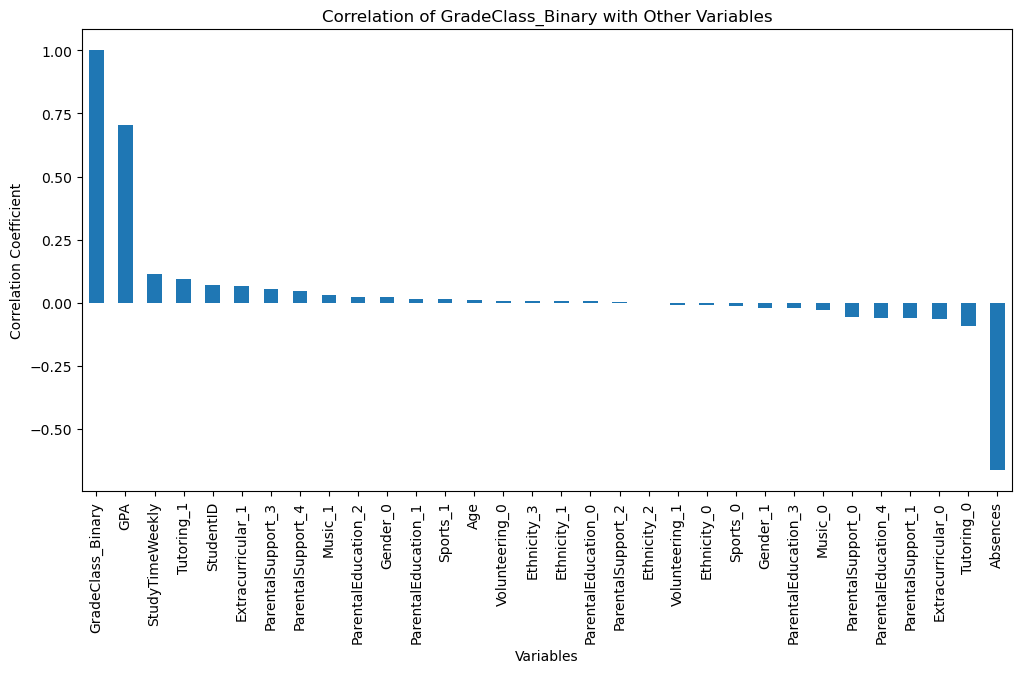

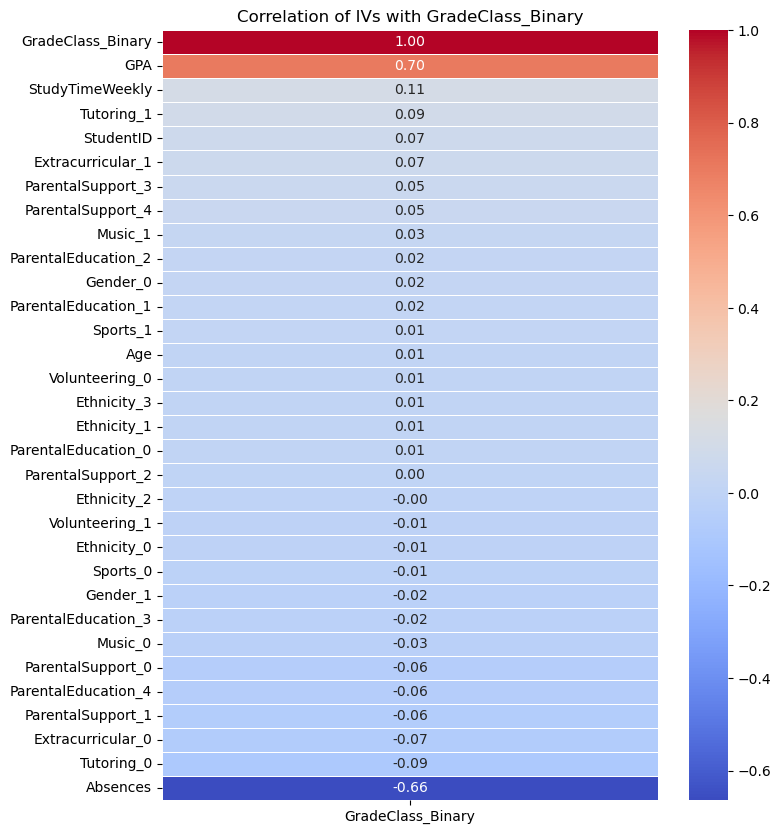

Correlated IVs with 'GradeClass_Binary':
GradeClass_Binary      1.000000
GPA                    0.702296
StudyTimeWeekly        0.113618
Tutoring_1             0.093325
StudentID              0.071951
Extracurricular_1      0.066252
ParentalSupport_3      0.054219
ParentalSupport_4      0.048131
Music_1                0.029221
ParentalEducation_2    0.022971
Gender_0               0.021210
ParentalEducation_1    0.016674
Sports_1               0.014040
Age                    0.011599
Volunteering_0         0.008774
Ethnicity_3            0.008690
Ethnicity_1            0.008677
ParentalEducation_0    0.006172
ParentalSupport_2      0.001390
Ethnicity_2           -0.001593
Volunteering_1        -0.008774
Ethnicity_0           -0.010798
Sports_0              -0.014040
Gender_1              -0.021210
ParentalEducation_3   -0.021571
Music_0               -0.029221
ParentalSupport_0     -0.056662
ParentalEducation_4   -0.059410
ParentalSupport_1     -0.059522
Extracurricular_0     -0.066252

In [16]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Get correlations with the dependent variable (DV) 'GradeClass_Binary'
dv_correlation = correlation_matrix['GradeClass_Binary'].sort_values(ascending=False)

# Plot the correlation of DV with other variables
plt.figure(figsize=(12, 6))
dv_correlation.plot(kind='bar')
plt.title('Correlation of GradeClass_Binary with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(dv_correlation.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of IVs with GradeClass_Binary")
plt.show()

# Print top significant IVs
print("Correlated IVs with 'GradeClass_Binary':")
# Print the correlation values
print(dv_correlation)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor  

import matplotlib.pyplot as plt
import seaborn as sns


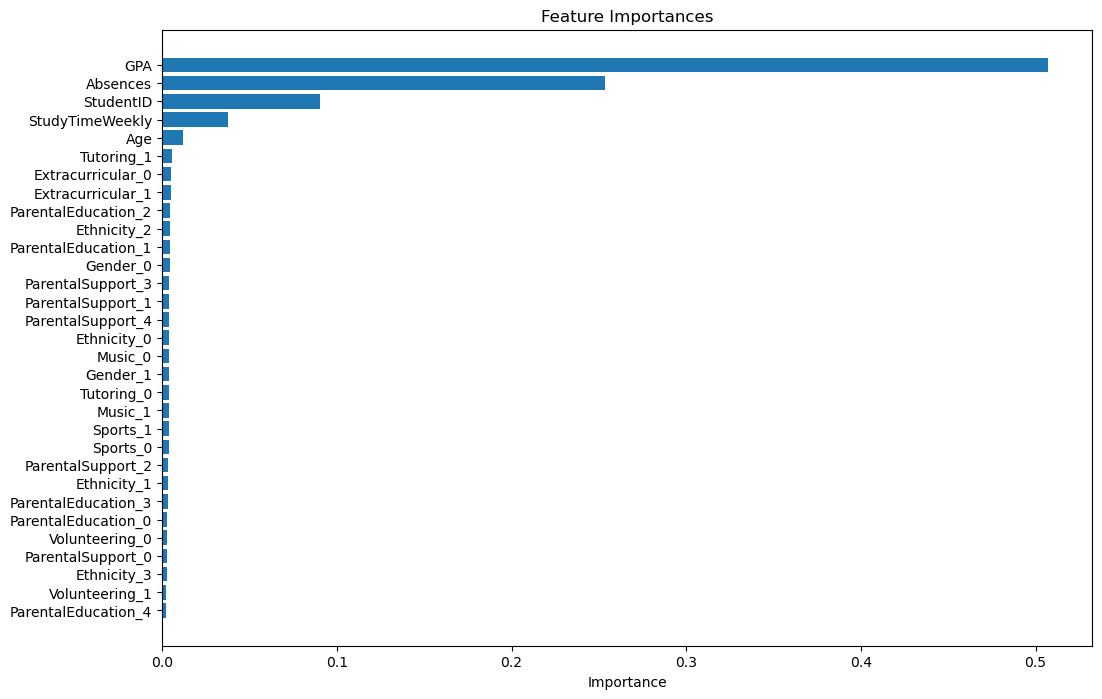

Feature Importances:
                Feature  Importance
4                   GPA    0.506950
3              Absences    0.253463
0             StudentID    0.090281
2       StudyTimeWeekly    0.037557
1                   Age    0.011765
17           Tutoring_1    0.005813
23    Extracurricular_0    0.004898
24    Extracurricular_1    0.004830
13  ParentalEducation_2    0.004551
9           Ethnicity_2    0.004531
12  ParentalEducation_1    0.004366
5              Gender_0    0.004305
21    ParentalSupport_3    0.004217
19    ParentalSupport_1    0.004128
22    ParentalSupport_4    0.004121
7           Ethnicity_0    0.004092
27              Music_0    0.003996
6              Gender_1    0.003988
16           Tutoring_0    0.003977
28              Music_1    0.003967
26             Sports_1    0.003814
25             Sports_0    0.003741
20    ParentalSupport_2    0.003525
8           Ethnicity_1    0.003484
14  ParentalEducation_3    0.003470
11  ParentalEducation_0    0.003080
29     

In [23]:
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['GradeClass_Binary'])
y = data['GradeClass_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

# Print feature importances
print("Feature Importances:")
print(feature_importances)

### Correlation Trend Analysis

The bar plot shows the correlation coefficients between the dependent variable (`GradeClass_Binary`) and the independent variables. The key observations are:

- **Positive Correlations**: Variables such as `GPA` ,`StudyTimeWeekly` and `ParentalSupport_Yes` show positive correlations with `GradeClass_Binary`, indicating that higher study time and parental support are associated with better grades.
- **Negative Correlations**: Variables such as `Absences` show negative correlations with `GradeClass_Binary`, indicating that higher absences are associated with poorer grades.
- **Insignificant Correlations**: Some variables, such as `Music` and `Extracurricular`, show little to no correlation with `GradeClass_Binary`, suggesting that these factors have minimal impact on the grades.

These trends align with common expectations in educational settings, where consistent study habits and parental support contribute positively to student performance, while frequent absences have a detrimental effect.

# Machine Learning Classification Model Development

## Steps Involved

1. **Load and Preprocess the Data**
   - Load the dataset, handle missing values, encode categorical variables, and split the data into training and testing sets.
   - Standardize numerical features.

2. **Train Different Models**
   - Various machine learning models are trained, including Logistic Regression, Random Forest, SVM, K-Nearest Neighbors, and Decision Tree.

3. **Evaluate Models**
   - Each model is evaluated on the test set. Accuracy, classification reports, and confusion matrices are printed.
   - A bar plot is created to compare the accuracy of different models.

4. **Enhance Accuracy**
   - Hyperparameter tuning is performed using GridSearchCV for the best model (Random Forest in this case).
   - The best model is trained with the optimal parameters and evaluated on the test set.
   - Cross-validation is performed to validate the best model.

## Explanation

- **Load and Preprocess the Data:** The dataset is loaded and preprocessed. Categorical variables are encoded, and the data is split into training and testing sets. Features are standardized.
- **Train Different Models:** Various machine learning models are trained to compare their performance.
- **Evaluate Models:** Accuracy, classification reports, and confusion matrices are printed to assess model performance.
- **Plot Model Accuracy:** A bar plot is created to compare the accuracy of different models.
- **Hyperparameter Tuning:** GridSearchCV is used to fine-tune hyperparameters.
- **Evaluate the Best Model:** The best-performing model is trained with optimal parameters and evaluated on the test set.
- **Cross-Validation:** Ensures the robustness of the best model by validating its performance on different subsets of data.


In [19]:
# Save the cleaned dataset
data.to_csv('transformed_grade_data.csv', index=False)

**1. Did you try working with various train-test combinations (split, random state)? Are the results consistent?**

Yes, different train-test splits and random states can be tried to ensure the model's results are consistent. The code already uses a standard split, but we can try different splits and random states. In this case, there's no difference in the accuracy score when changing the train-test ratio.



**2. Which features are the most significant predictors for the IV?**

To determine the most significant predictors for the dependent variable (DV) GradeClass_Binary, we can analyze the coefficients of the logistic regression model. Significant predictors are typically identified by the magnitude of their coefficients, Feature importance can be calculated for tree-based models like RandomForest.

In [25]:
!pip install pandas seaborn matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## Using Logistic Regression

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.91231733 0.93528184 0.96443515 0.94560669 0.75523013]
Mean cross-validation score: 0.9025742262908256
Confusion Matrix:
 [[307  16]
 [ 20 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       323
           1       0.89      0.87      0.88       156

    accuracy                           0.92       479
   macro avg       0.92      0.91      0.91       479
weighted avg       0.92      0.92      0.92       479

Accuracy Score: 0.9248434237995825


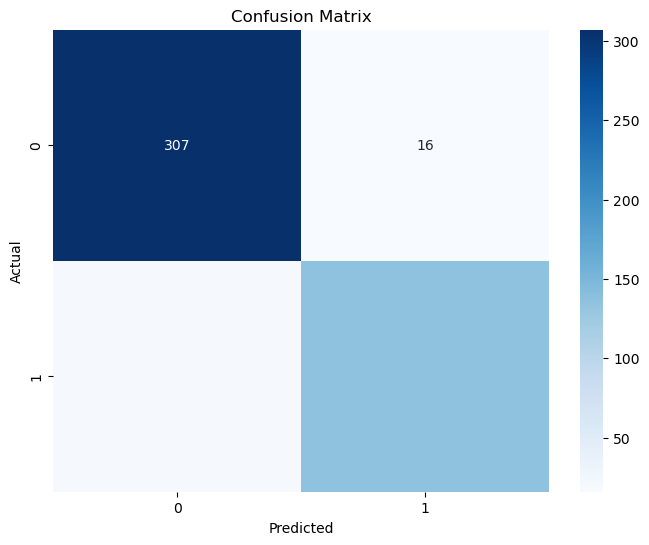

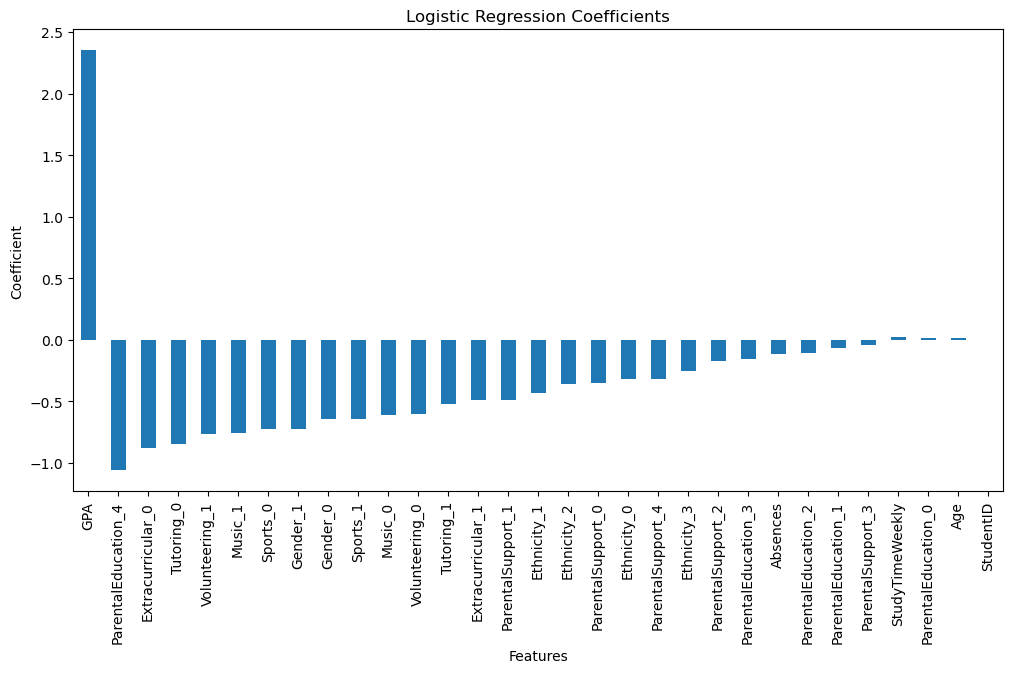

                     Coefficient  Absolute Coefficient
GPA                     2.350664              2.350664
ParentalEducation_4    -1.061707              1.061707
Extracurricular_0      -0.876901              0.876901
Tutoring_0             -0.847039              0.847039
Volunteering_1         -0.765126              0.765126
Music_1                -0.755318              0.755318
Sports_0               -0.724919              0.724919
Gender_1               -0.723039              0.723039
Gender_0               -0.647639              0.647639
Sports_1               -0.645759              0.645759
Music_0                -0.615360              0.615360
Volunteering_0         -0.605552              0.605552
Tutoring_1             -0.523638              0.523638
Extracurricular_1      -0.493777              0.493777
ParentalSupport_1      -0.492369              0.492369
Ethnicity_1            -0.437200              0.437200
Ethnicity_2            -0.360410              0.360410
ParentalSu

In [25]:
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['GradeClass_Binary'])
y = data['GradeClass_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
# Perform cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analyze the coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg.coef_.flatten(), X.columns, columns=['Coefficient'])
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the coefficients of the logistic regression model
plt.figure(figsize=(12, 6))
coefficients['Coefficient'].plot(kind='bar')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

# Print the sorted coefficients
print(coefficients)

# Multicollinearity in Regression Models

Multicollinearity refers to a situation in multiple regression models where two or more predictor variables (independent variables) are highly correlated. This means that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy.

## Why Multicollinearity is a Problem:
- **Redundancy:** When predictor variables are highly correlated, they carry redundant information. This can make it difficult to determine the individual effect of each predictor on the dependent variable.  
- **Coefficient Instability:** High multicollinearity can lead to large standard errors for the regression coefficients, making them unstable and sensitive to small changes in the model.  
- **Interpretability:** It becomes challenging to interpret the coefficients of the predictor variables, as it is hard to attribute changes in the dependent variable to one predictor variable independently of the others.  

## Detecting Multicollinearity:
- **Correlation Matrix:** A correlation matrix can show the pairwise correlation coefficients between predictor variables. High correlations (close to +1 or -1) suggest multicollinearity.  
- **Variance Inflation Factor (VIF):** VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. A VIF value greater than 5 or 10 indicates a problematic level of multicollinearity.  

## Addressing Multicollinearity:
- **Remove Highly Correlated Predictors:** If two predictors are highly correlated, consider removing one of them from the model.  
- **Principal Component Analysis (PCA):** PCA can transform the correlated predictors into a set of uncorrelated components.  
- **Regularization Techniques:** Techniques like Ridge Regression and Lasso Regression can help mitigate the impact of multicollinearity by adding a penalty to toeffie of the coefficients.  


## 3. How does the model handle the potential multi-collinearity between features?**

To handle potential multicollinearity in a logistic regression model, we can use techniques such as Variance Inflation Factor (VIF) to detect multicollinearity and then address it by removing or combining highly collinear features.tion Factor (VIF)`.

**Data Type Conversion:** Convert all features to numeric data types using pd.to_numeric(), coercing errors to NaN.

**Drop NaN Values:** After conversion, drop any remaining rows with NaN values to ensure all data is numeric.

**Standardization:** Standardize the features using StandardScaler to ensure that VIF calculations are not affected by different scales of the features.

**VIF Calculation and Removal:** Calculate VIF, remove features with VIF > 10, and recalculate VIF to handle multicollinearity.

**Model Training and Evaluation:** Train a logistic regression model and evaluate its performance.

## Handling MultiCollinearity using VIF

## After removal of columns using VIF
The drastic drop in accuracy after removing features with high `Variance Inflation Factor (VIF)` suggests that the model might be `overfitting` when all features are included, or that the removal of some features has significantly reduced the model's ability to make accurate predictions.

**Steps to Consider:**

- **Check for Overfitting:** The perfect accuracy before removing features might indicate overfitting. This means the model is performing well on the training data but might not generalize well to unseen data.
- **Evaluate Feature Importance:** Instead of solely relying on `VIF`, you can also use feature importance from tree-based models (like RandomForest) to identify and keep the most important features.
- **Regularization:** Apply regularization techniques (like L1 or L2 regularization) in the logistic regression model to handle multicollinearity and prevent overfitting.
- **Cross-Validation:** Use cross-validation to better assess the model's performance and ensure it generalizes well to unseen data.

**Explanation:**

- **Feature Importance with RandomForest:** A `RandomForestClassifier` is used to identify and keep the most important features.
- **Regularization:** `L2 regularization` is applied to the logistic regression model to handle multicollinearity and prevent overfitting.
- **Cross-Validation:** `Cross-validation` is used to better assess the model's performance and ensure it generalizes well to unseen data.
a.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Variance Inflation Factor (VIF) before removing multicollinearity:
                 Feature           VIF
0             StudentID  1.011252e+00
1                   Age  1.015321e+00
2       StudyTimeWeekly  1.703662e+00
3              Absences  1.965607e+01
4                   GPA  2.187377e+01
5              Gender_0           inf
6              Gender_1  8.808389e+03
7           Ethnicity_0           inf
8           Ethnicity_1           inf
9           Ethnicity_2           inf
10          Ethnicity_3           inf
11  ParentalEducation_0           inf
12  ParentalEducation_1  1.039719e+04
13  ParentalEducation_2  2.356426e+04
14  ParentalEducation_3           inf
15  ParentalEducation_4           inf
16           Tutoring_0  1.403831e+03
17           Tutoring_1  7.894537e+03
18    ParentalSupport_0           inf
19    ParentalSupport_1           inf
20    ParentalSupport_2           inf
21    ParentalSupport_3           inf
22    ParentalSupport_4           inf
23    Extracurricula

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


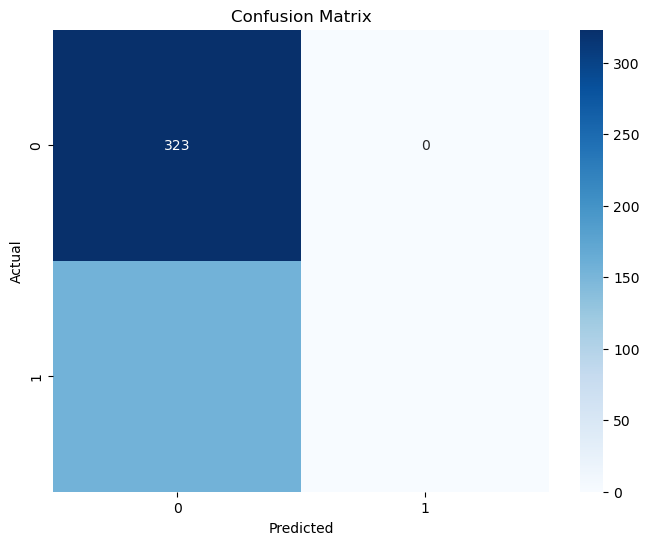

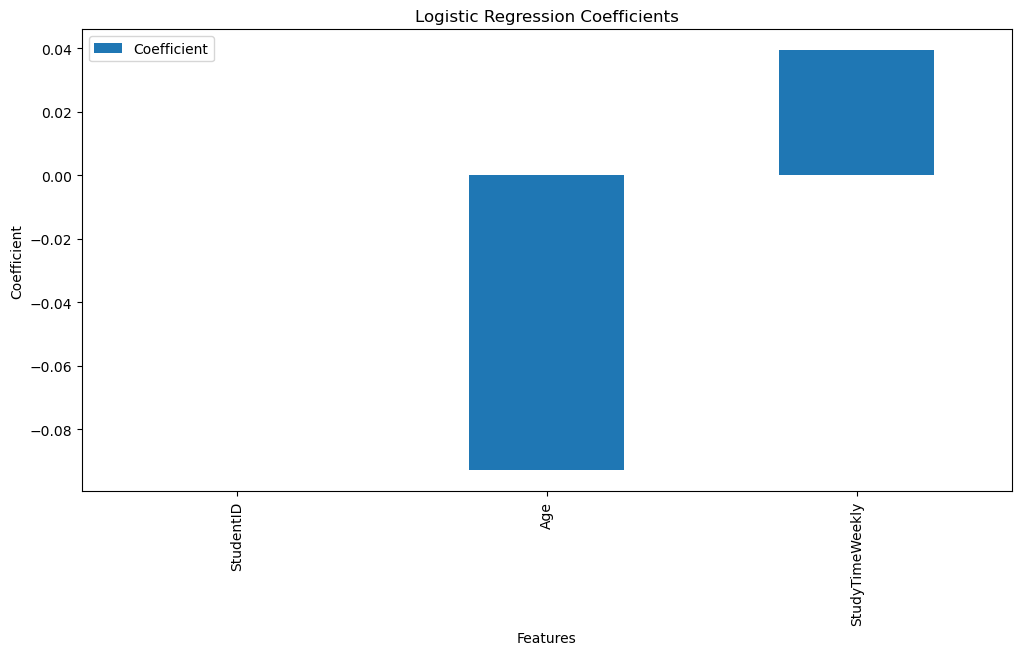

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Ensure all data is numeric and handle any remaining non-numeric data
data = data.dropna()

# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['GradeClass_Binary'])
y = data['GradeClass_Binary']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Print VIF values
print("Variance Inflation Factor (VIF) before removing multicollinearity:\n", vif_data)

# Remove features with VIF > 10 (common threshold for multicollinearity)
features_to_keep = vif_data[vif_data["VIF"] <= 10]["Feature"]
X = X[features_to_keep]

# Recalculate VIF after removing multicollinear features
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Print VIF values after removing multicollinear features
print("Variance Inflation Factor (VIF) after removing multicollinearity:\n", vif_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg.coef_.flatten(), X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', figsize=(12, 6))
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

## Handling Multi-Collinearity and Overfitting using L2(Lasso) Regression 

Feature Importances:
                      Importance
GPA                    0.491565
Absences               0.277423
StudentID              0.087440
StudyTimeWeekly        0.036455
Age                    0.011467
Tutoring_0             0.005072
ParentalSupport_3      0.004678
Tutoring_1             0.004625
ParentalEducation_1    0.004550
Ethnicity_0            0.004497
Extracurricular_1      0.004284
ParentalEducation_2    0.004262
Extracurricular_0      0.004087
Gender_1               0.004033
ParentalSupport_1      0.003992
ParentalSupport_4      0.003989
Ethnicity_2            0.003897
Sports_0               0.003765
Music_0                0.003762
Sports_1               0.003671
Gender_0               0.003561
ParentalSupport_0      0.003329
Music_1                0.003250
Ethnicity_1            0.003243
ParentalSupport_2      0.003183
ParentalEducation_3    0.003041
ParentalEducation_0    0.002987
Volunteering_0         0.002972
Volunteering_1         0.002868
Ethnicity_3       

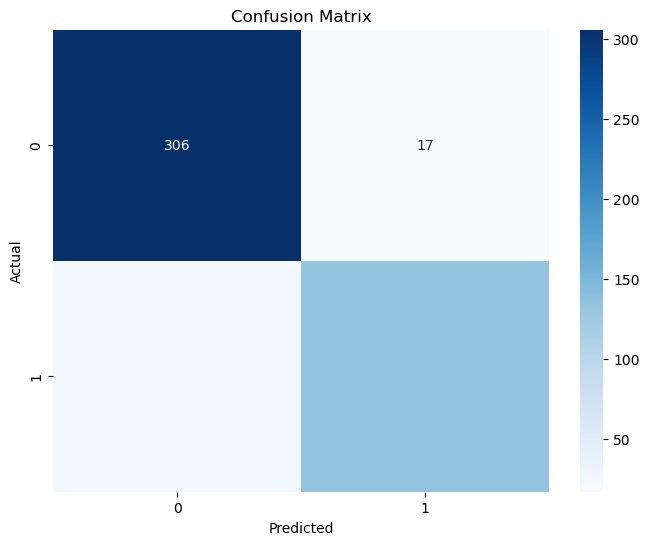

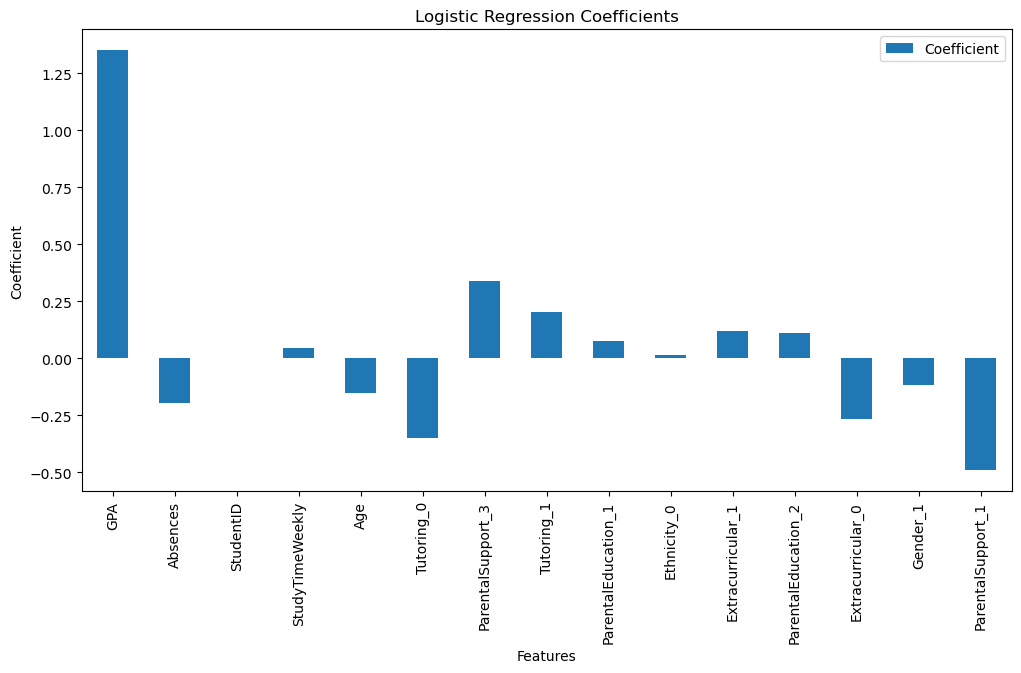

In [24]:
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['GradeClass_Binary'])
y = data['GradeClass_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Evaluate feature importance using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = pd.DataFrame(rf.feature_importances_, X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:\n", feature_importances)

# Keep the top N important features (you can adjust N based on your needs)
top_features = feature_importances.head(15).index
features_removed_importance = feature_importances.tail(len(feature_importances) - 15).index
X = X[top_features]

print("Features removed due to low importance:\n", features_removed_importance.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with regularization
logreg = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear')
logreg.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg.coef_.flatten(), X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', figsize=(12, 6))
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

**If you feel to choose an optimum value of Threshold value, what would be your consideration? Does ROC, Precision-Recall curve helps you in this?**

## ROC, Precision-Recall curve 

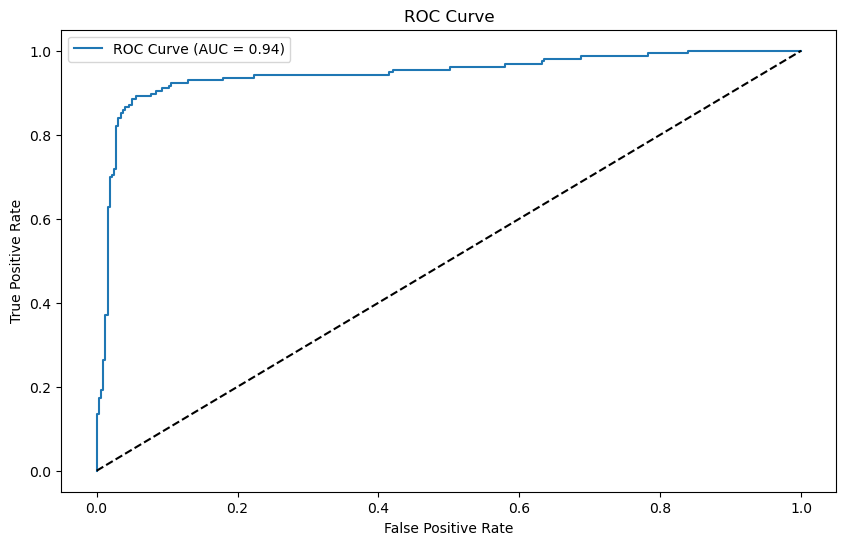

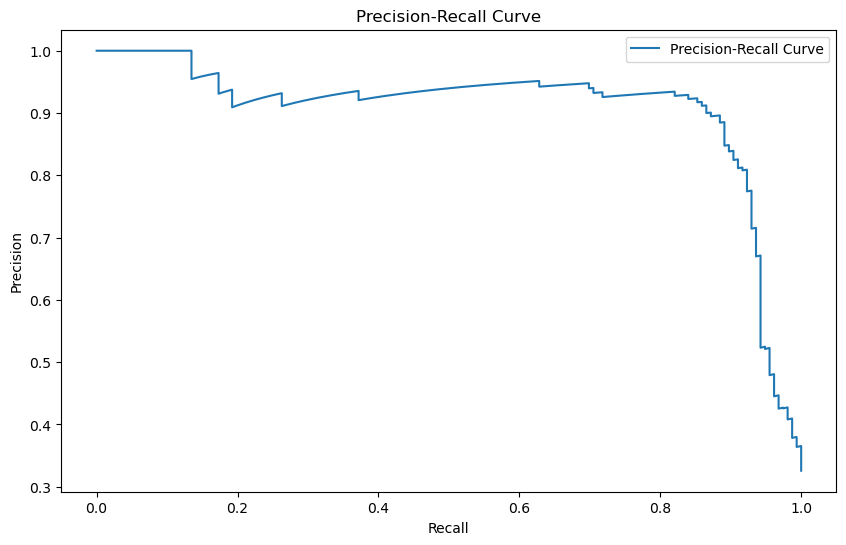

Optimal Threshold: 0.4821196062465645
F1-Score at Optimal Threshold: 0.8903225806451613
Confusion Matrix at Optimal Threshold:
[[307  16]
 [ 18 138]]
Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       323
           1       0.90      0.88      0.89       156

    accuracy                           0.93       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.93      0.93      0.93       479



In [27]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, f1_score
# Define the feature variables (X) and the target variable (y)
X = data.drop(columns=['GradeClass_Binary'])
y = data['GradeClass_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Find the optimal threshold
optimal_idx = np.argmax(f1_scores)
optimal_threshold = pr_thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')
print(f'F1-Score at Optimal Threshold: {f1_scores[optimal_idx]}')

# Evaluate the model at the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)
print(f'Confusion Matrix at Optimal Threshold:\n{confusion_matrix(y_test, y_pred_optimal)}')
print(f'Classification Report at Optimal Threshold:\n{classification_report(y_test, y_pred_optimal)}')

In [47]:
# Define the feature variables (X) and the target variable (y) for higher grades
data['HighGrade'] = (data['GradeClass'] <= 1).astype(int)  # Assuming GradeClass <= 1 as higher grade (A or B)
data['LowGrade'] = (data['GradeClass'] >= 3).astype(int)   # Assuming GradeClass >= 3 as lower grade (D or F)

# Features for study time and tutoring support analysis
X_study_tutor = data[['StudyTimeWeekly', 'Tutoring']]
y_high_grade = data['HighGrade']

# Split the data into training and testing sets
X_train_study_tutor, X_test_study_tutor, y_train_high_grade, y_test_high_grade = train_test_split(X_study_tutor, y_high_grade, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model for study time and tutoring support
logreg_study_tutor = LogisticRegression(max_iter=1000)
logreg_study_tutor.fit(X_train_study_tutor, y_train_high_grade)

# Predict probabilities for the test set
y_probs_study_tutor = logreg_study_tutor.predict_proba(X_test_study_tutor)[:, 1]

# Evaluate the model
y_pred_study_tutor = logreg_study_tutor.predict(X_test_study_tutor)
print("Confusion Matrix for Higher Grades:")
print(confusion_matrix(y_test_high_grade, y_pred_study_tutor))
print("Classification Report for Higher Grades:")
print(classification_report(y_test_high_grade, y_pred_study_tutor))

# Features for extracurricular participation and parental support analysis
# High parental support (>= 2) is considered as 1 (Yes), otherwise 0 (No)
data['HighParentalSupport'] = (data['ParentalSupport'] >= 2).astype(int)
X_extracurricular_parental = data[['Extracurricular', 'HighParentalSupport']]
y_low_grade = data['LowGrade']

# Split the data into training and testing sets
X_train_extracurricular_parental, X_test_extracurricular_parental, y_train_low_grade, y_test_low_grade = train_test_split(X_extracurricular_parental, y_low_grade, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model for extracurricular participation and parental support
logreg_extracurricular_parental = LogisticRegression(max_iter=1000)
logreg_extracurricular_parental.fit(X_train_extracurricular_parental, y_train_low_grade)

# Predict probabilities for the test set
y_probs_extracurricular_parental = logreg_extracurricular_parental.predict_proba(X_test_extracurricular_parental)[:, 1]

# Evaluate the model
y_pred_extracurricular_parental = logreg_extracurricular_parental.predict(X_test_extracurricular_parental)
print("Confusion Matrix for Lower Grades:")
print(confusion_matrix(y_test_low_grade, y_pred_extracurricular_parental))
print("Classification Report for Lower Grades:")
print(classification_report(y_test_low_grade, y_pred_extracurricular_parental))

# Example probabilities for a specific student
example_student_study_tutor = [[20, 1]]  # More than 10 hours study, tutoring support
example_student_extracurricular_parental = [[1, 1]]  # Extracurricular participation, high parental support

# Predict probability for higher grades
prob_high_grade = logreg_study_tutor.predict_proba(example_student_study_tutor)[:, 1]
print(f"Probability of achieving higher grade with more than 20 hours study and tutoring support: {prob_high_grade[0]}")

# Predict probability for lower grades
prob_low_grade = logreg_extracurricular_parental.predict_proba(example_student_extracurricular_parental)[:, 1]
print(f"Probability of falling into lower grade category based on extracurricular participation and high parental support: {prob_low_grade[0]}")

Confusion Matrix for Higher Grades:
[[408   0]
 [ 71   0]]
Classification Report for Higher Grades:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       408
           1       0.00      0.00      0.00        71

    accuracy                           0.85       479
   macro avg       0.43      0.50      0.46       479
weighted avg       0.73      0.85      0.78       479

Confusion Matrix for Lower Grades:
[[  0 156]
 [  0 323]]
Classification Report for Lower Grades:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       156
           1       0.67      1.00      0.81       323

    accuracy                           0.67       479
   macro avg       0.34      0.50      0.40       479
weighted avg       0.45      0.67      0.54       479

Probability of achieving higher grade with more than 20 hours study and tutoring support: 0.33479798192898796
Probability of falling into lower grad

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metr